In [ ]:
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import numpy as np
import os, sys

sys.path.insert(0, os.path.abspath('..'))
from configs import datasets_config as config

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({'font.size': 17, 'legend.fontsize': 17})    

boiler_root = config.main_path['main']

rank = 10
rng = np.arange(0, rank) + 1
ticks = np.arange(0, (len(rng) + 1), 1)

if not os.path.exists(os.path.join('../graphs', 'cmc_roc')):
    os.makedirs(os.path.join('../graphs', 'cmc_roc'))

def get_avg_cmc(dict_list):
    total_ir = 0
    ir_list = []
    if 'avg' in dict_list.keys():
        del dict_list['avg']
    if 'std' in dict_list.keys():
        del dict_list['std']
    for items in dict_list:
        total_ir += dict_list[items]
        ir_list.append(dict_list[items])
    dict_list['avg'] = total_ir/len(dict_list)
    dict_list['std'] = np.std(np.array(ir_list)) * 100

    return dict_list

In [ ]:
peri_cmc_dict = get_avg_cmc(torch.load('../data/cmc/cb_net/peri/peri_cmc_dict.pt'))
face_cmc_dict = get_avg_cmc(torch.load('../data/cmc/cb_net/face/face_cmc_dict.pt'))

cm_cmc_dict_f = get_avg_cmc(torch.load('../data/cmc/cb_net/cm/cm_cmc_dict_f.pt'))
cm_cmc_dict_p = get_avg_cmc(torch.load('../data/cmc/cb_net/cm/cm_cmc_dict_p.pt'))

mm_cmc_dict_score = get_avg_cmc(torch.load('../data/cmc/cb_net/mm/mm_cmc_dict_score.pt'))
mm_cmc_dict_mean = get_avg_cmc(torch.load('../data/cmc/cb_net/mm/mm_cmc_dict_mean.pt'))
mm_cmc_dict_max = get_avg_cmc(torch.load('../data/cmc/cb_net/mm/mm_cmc_dict_max.pt'))
mm_cmc_dict_concat = get_avg_cmc(torch.load('../data/cmc/cb_net/mm/mm_cmc_dict_concat.pt'))

In [ ]:
peri_cmc_dict_base = get_avg_cmc(torch.load('../data/cmc/cb_net_baseline/peri/peri_cmc_dict.pt'))
face_cmc_dict_base = get_avg_cmc(torch.load('../data/cmc/cb_net_baseline/face/face_cmc_dict.pt'))

cm_cmc_dict_f_base = get_avg_cmc(torch.load('../data/cmc/cb_net_baseline/cm/cm_cmc_dict_f.pt'))
cm_cmc_dict_p_base = get_avg_cmc(torch.load('../data/cmc/cb_net_baseline/cm/cm_cmc_dict_p.pt'))

mm_cmc_dict_score_base = get_avg_cmc(torch.load('../data/cmc/cb_net_baseline/mm/mm_cmc_dict_score.pt'))
mm_cmc_dict_mean_base = get_avg_cmc(torch.load('../data/cmc/cb_net_baseline/mm/mm_cmc_dict_mean.pt'))
mm_cmc_dict_max_base = get_avg_cmc(torch.load('../data/cmc/cb_net_baseline/mm/mm_cmc_dict_max.pt'))
mm_cmc_dict_concat_base = get_avg_cmc(torch.load('../data/cmc/cb_net_baseline/mm/mm_cmc_dict_concat.pt'))

In [ ]:
def get_avg(fpr_val, tpr_val):
    range_eval = np.arange(0, 1, 1e-6)
    # total_fpr = np.empty((0, range_eval.shape[0]), int)
    total_tpr = np.empty((0, range_eval.shape[0]), int)
    
    for ds in fpr_val:
        interp_y = np.interp(range_eval, fpr_val[ds], tpr_val[ds])
        total_tpr = np.append(total_tpr, np.array([interp_y]), axis=0)
    avg_tpr = np.mean(total_tpr, axis=0)

    return range_eval, avg_tpr

face_eer_dict = torch.load('../data/roc/cb_net/face/face_eer_dict.pt')
face_fpr_dict = torch.load('../data/roc/cb_net/face/face_fpr_dict.pt')
face_tpr_dict = torch.load('../data/roc/cb_net/face/face_tpr_dict.pt')
face_auc_dict = torch.load('../data/roc/cb_net/face/face_auc_dict.pt')

peri_eer_dict = torch.load('../data/roc/cb_net/peri/peri_eer_dict.pt')
peri_fpr_dict = torch.load('../data/roc/cb_net/peri/peri_fpr_dict.pt')
peri_tpr_dict = torch.load('../data/roc/cb_net/peri/peri_tpr_dict.pt')
peri_auc_dict = torch.load('../data/roc/cb_net/peri/peri_auc_dict.pt')

cm_eer_dict = torch.load('../data/roc/cb_net/cm/cm_eer_dict.pt')
cm_fpr_dict = torch.load('../data/roc/cb_net/cm/cm_fpr_dict.pt')
cm_tpr_dict = torch.load('../data/roc/cb_net/cm/cm_tpr_dict.pt')
cm_auc_dict = torch.load('../data/roc/cb_net/cm/cm_auc_dict.pt')

mm_eer_dict_score = torch.load('../data/roc/cb_net/mm/mm_eer_dict_score.pt')
mm_fpr_dict_score = torch.load('../data/roc/cb_net/mm/mm_fpr_dict_score.pt')
mm_tpr_dict_score = torch.load('../data/roc/cb_net/mm/mm_tpr_dict_score.pt')
mm_auc_dict_score = torch.load('../data/roc/cb_net/mm/mm_auc_dict_score.pt')

mm_eer_dict_max = torch.load('../data/roc/cb_net/mm/mm_eer_dict_max.pt')
mm_fpr_dict_max = torch.load('../data/roc/cb_net/mm/mm_fpr_dict_max.pt')
mm_tpr_dict_max = torch.load('../data/roc/cb_net/mm/mm_tpr_dict_max.pt')
mm_auc_dict_max = torch.load('../data/roc/cb_net/mm/mm_auc_dict_max.pt')

mm_eer_dict_mean = torch.load('../data/roc/cb_net/mm/mm_eer_dict_mean.pt')
mm_fpr_dict_mean = torch.load('../data/roc/cb_net/mm/mm_fpr_dict_mean.pt')
mm_tpr_dict_mean = torch.load('../data/roc/cb_net/mm/mm_tpr_dict_mean.pt')
mm_auc_dict_mean = torch.load('../data/roc/cb_net/mm/mm_auc_dict_mean.pt')

mm_eer_dict_concat = torch.load('../data/roc/cb_net/mm/mm_eer_dict_concat.pt')
mm_fpr_dict_concat = torch.load('../data/roc/cb_net/mm/mm_fpr_dict_concat.pt')
mm_tpr_dict_concat = torch.load('../data/roc/cb_net/mm/mm_tpr_dict_concat.pt')
mm_auc_dict_concat = torch.load('../data/roc/cb_net/mm/mm_auc_dict_concat.pt')

In [17]:
face_eer_dict_base = torch.load('../data/roc/cb_net_baseline/face/face_eer_dict.pt')
face_fpr_dict_base = torch.load('../data/roc/cb_net_baseline/face/face_fpr_dict.pt')
face_tpr_dict_base = torch.load('../data/roc/cb_net_baseline/face/face_tpr_dict.pt')
face_auc_dict_base = torch.load('../data/roc/cb_net_baseline/face/face_auc_dict.pt')

peri_eer_dict_base = torch.load('../data/roc/cb_net_baseline/peri/peri_eer_dict.pt')
peri_fpr_dict_base = torch.load('../data/roc/cb_net_baseline/peri/peri_fpr_dict.pt')
peri_tpr_dict_base = torch.load('../data/roc/cb_net_baseline/peri/peri_tpr_dict.pt')
peri_auc_dict_base = torch.load('../data/roc/cb_net_baseline/peri/peri_auc_dict.pt')

cm_eer_dict_base = torch.load('../data/roc/cb_net_baseline/cm/cm_eer_dict.pt')
cm_fpr_dict_base = torch.load('../data/roc/cb_net_baseline/cm/cm_fpr_dict.pt')
cm_tpr_dict_base = torch.load('../data/roc/cb_net_baseline/cm/cm_tpr_dict.pt')
cm_auc_dict_base = torch.load('../data/roc/cb_net_baseline/cm/cm_auc_dict.pt')

mm_eer_dict_score_base = torch.load('../data/roc/cb_net_baseline/mm/mm_eer_dict_score.pt')
mm_fpr_dict_score_base = torch.load('../data/roc/cb_net_baseline/mm/mm_fpr_dict_score.pt')
mm_tpr_dict_score_base = torch.load('../data/roc/cb_net_baseline/mm/mm_tpr_dict_score.pt')
mm_auc_dict_score_base = torch.load('../data/roc/cb_net_baseline/mm/mm_auc_dict_score.pt')

mm_eer_dict_max_base = torch.load('../data/roc/cb_net_baseline/mm/mm_eer_dict_max.pt')
mm_fpr_dict_max_base = torch.load('../data/roc/cb_net_baseline/mm/mm_fpr_dict_max.pt')
mm_tpr_dict_max_base = torch.load('../data/roc/cb_net_baseline/mm/mm_tpr_dict_max.pt')
mm_auc_dict_max_base = torch.load('../data/roc/cb_net_baseline/mm/mm_auc_dict_max.pt')

mm_eer_dict_mean_base = torch.load('../data/roc/cb_net_baseline/mm/mm_eer_dict_mean.pt')
mm_fpr_dict_mean_base = torch.load('../data/roc/cb_net_baseline/mm/mm_fpr_dict_mean.pt')
mm_tpr_dict_mean_base = torch.load('../data/roc/cb_net_baseline/mm/mm_tpr_dict_mean.pt')
mm_auc_dict_mean_base = torch.load('../data/roc/cb_net_baseline/mm/mm_auc_dict_mean.pt')

mm_eer_dict_concat_base = torch.load('../data/roc/cb_net_baseline/mm/mm_eer_dict_concat.pt')
mm_fpr_dict_concat_base = torch.load('../data/roc/cb_net_baseline/mm/mm_fpr_dict_concat.pt')
mm_tpr_dict_concat_base = torch.load('../data/roc/cb_net_baseline/mm/mm_tpr_dict_concat.pt')
mm_auc_dict_concat_base = torch.load('../data/roc/cb_net_baseline/mm/mm_auc_dict_concat.pt')

In [18]:
peri_avg, face_avg, peri_avg_base, face_avg_base = [], [], [], []
for ds_ in peri_auc_dict:
    peri_avg.append(peri_auc_dict[ds_])
    face_avg.append(face_auc_dict[ds_])
    peri_avg_base.append(peri_auc_dict_base[ds_])
    face_avg_base.append(face_auc_dict_base[ds_])

peri_avg = np.mean(np.array(peri_avg), 0)
face_avg = np.mean(np.array(face_avg), 0)
peri_avg_base = np.mean(np.array(peri_avg_base), 0)
face_avg_base = np.mean(np.array(face_avg_base), 0)

range_, peri_tpr = get_avg(peri_fpr_dict, peri_tpr_dict)
range_, face_tpr = get_avg(face_fpr_dict, face_tpr_dict)
range_, peri_tpr_base = get_avg(peri_fpr_dict_base, peri_tpr_dict_base)
range_, face_tpr_base = get_avg(face_fpr_dict_base, face_tpr_dict_base)

/tmp/ipykernel_3818440/3689393198.py:35: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([peri_roc, peri_roc_base, face_roc, face_roc_base],     # The line objects


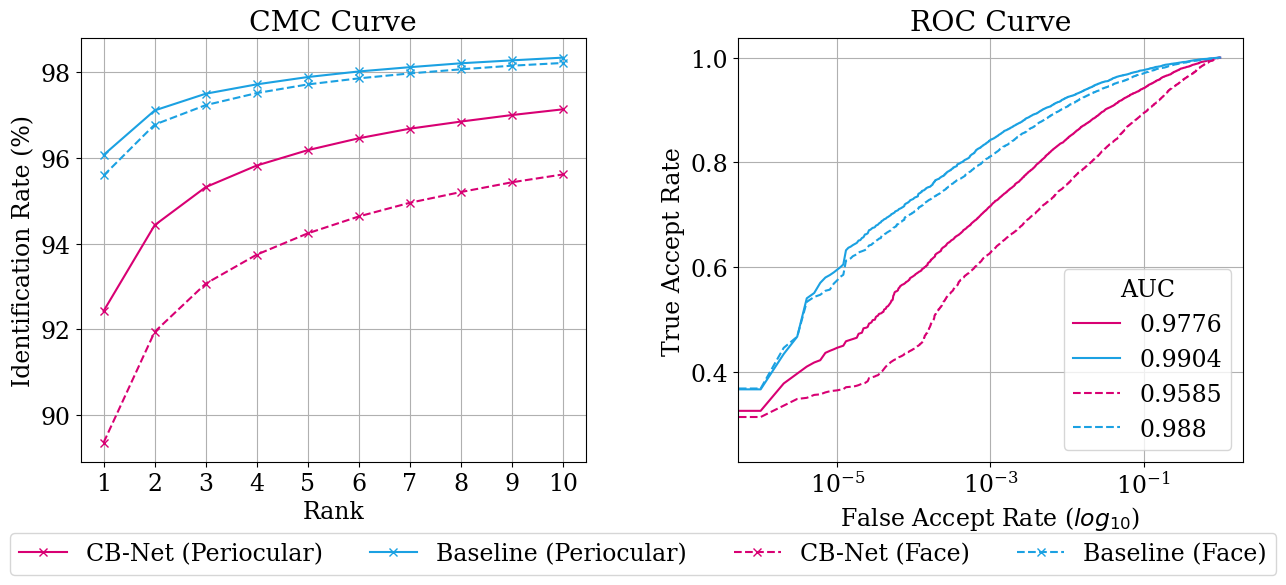

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({'font.size': 17, 'legend.fontsize': 17})    
fig, (ax1, ax2) = plt.subplots(1, 2)
# fig, ax = plt.figure()
fig.set_figheight(5.5)
fig.set_figwidth(15)
ax1.grid(which='both')
ax1.set_xticks(ticks)
ax1.set_title('CMC Curve')
peri_cmc = ax1.plot(rng, 100 * peri_cmc_dict['avg'], marker = 'x', color = '#d80073')
face_cmc = ax1.plot(rng, 100 * face_cmc_dict['avg'], marker = 'x', color = '#1ba1e2')
peri_cmc_base = ax1.plot(rng, 100 * peri_cmc_dict_base['avg'], marker = 'x', color = '#d80073', linestyle='--')
face_cmc_base = ax1.plot(rng, 100 * face_cmc_dict_base['avg'], marker = 'x', color = '#1ba1e2', linestyle='--')
ax1.set_xlabel('Rank')
ax1.set_ylabel('Identification Rate (%)')

plt.subplots_adjust(wspace=0.3)

ax2.grid(which='both')
ax2.set_title('ROC Curve')
peri_roc = ax2.plot(range_, peri_tpr, label=str(round(peri_avg, 4)), color = '#d80073')
face_roc = ax2.plot(range_, face_tpr, label=str(round(face_avg, 4)), color = '#1ba1e2')
peri_roc_base = ax2.plot(range_, peri_tpr_base, label=str(round(peri_avg_base, 4)), color = '#d80073', linestyle='--')
face_roc_base = ax2.plot(range_, face_tpr_base, label=str(round(face_avg_base, 4)), color = '#1ba1e2', linestyle='--')
plt.semilogx(base=10)
ax2.set_ylabel('True Accept Rate')
ax2.set_xlabel('False Accept Rate ($log_{10}$)')
ax2.legend(bbox_to_anchor=(1, 0), loc="lower right", title="AUC")
# plt.xlim([0, 1.0])
# ax2.set_ylim([0.85, 1.001])

line_labels = ["CB-Net (Periocular)", "Baseline (Periocular)", "CB-Net (Face)", "Baseline (Face)"]

fig.legend([peri_roc, peri_roc_base, face_roc, face_roc_base],     # The line objects
   labels=line_labels,   # The labels for each line
   loc="lower center",
   bbox_to_anchor=(0.5, -0.1),
   ncol=8,    # Position of legend
   borderaxespad=0.1)

plt.savefig('../graphs/cmc_roc/peri_face_CMC_ROC.pdf', bbox_inches='tight')
plt.show()
plt.clf()

In [20]:
cm_avg, cm_avg_base = [], []
for ds_ in cm_auc_dict:
    cm_avg.append(cm_auc_dict[ds_])
    cm_avg_base.append(cm_auc_dict_base[ds_])

cm_avg = np.mean(np.array(cm_avg), 0)
cm_avg_base = np.mean(np.array(cm_avg_base), 0)

range_, cm_tpr = get_avg(cm_fpr_dict, cm_tpr_dict)
range_, cm_tpr_base = get_avg(cm_fpr_dict_base, cm_tpr_dict_base)

/tmp/ipykernel_3818440/829123879.py:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax1[0].legend(cmc_lines,
/tmp/ipykernel_3818440/829123879.py:27: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax2[0].legend(cmc_lines,
/tmp/ipykernel_3818440/829123879.py:34: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax3 = plt.subplot(122)


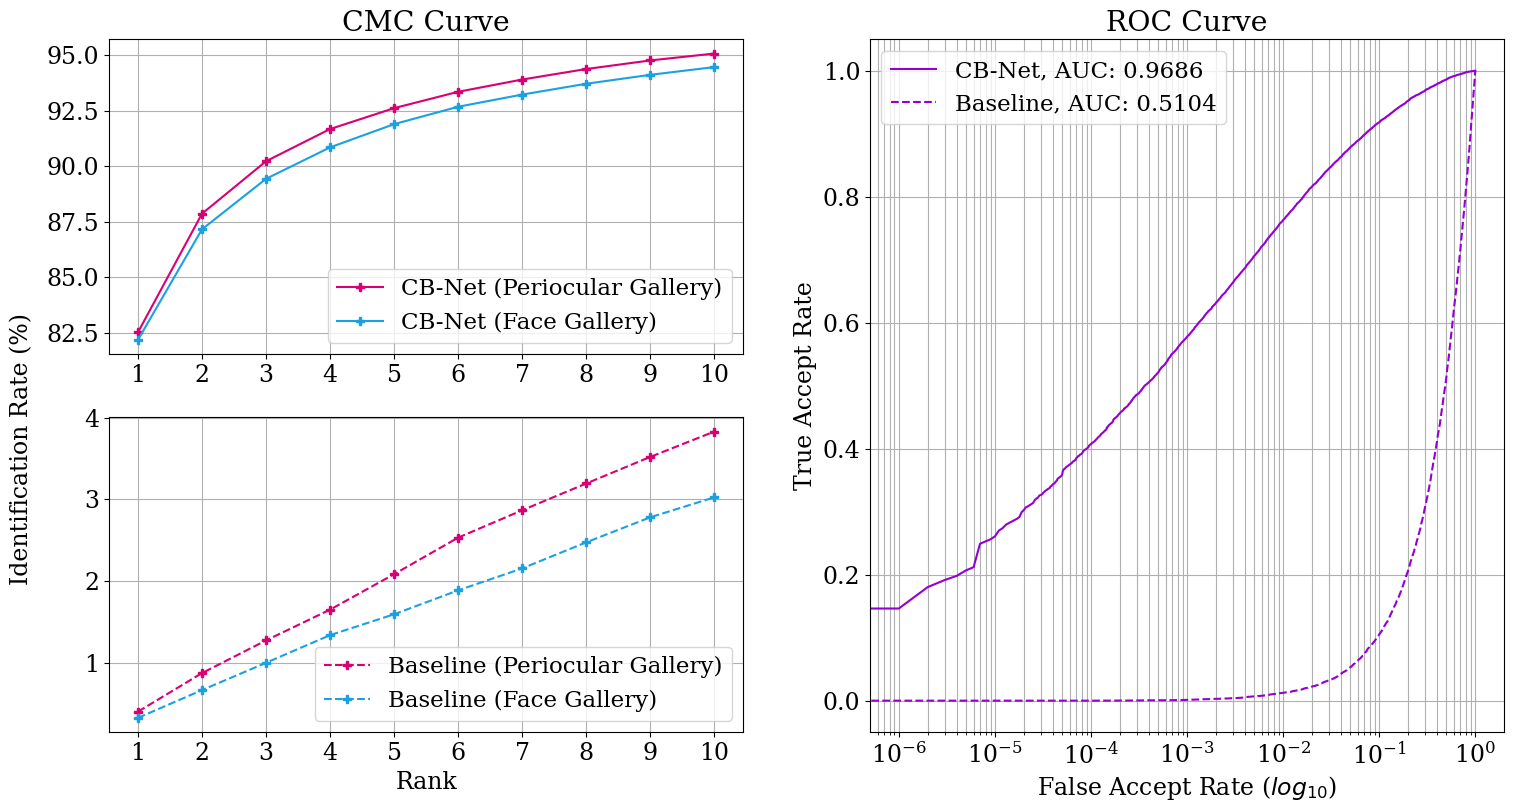

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({'font.size': 17, 'legend.fontsize': 16.5})    

fig, (ax1, ax2) = plt.subplots(2, 2)
fig.set_figheight(9)
fig.set_figwidth(18)

ax1[0].grid(which='both')
ax2[0].grid(which='both')
ax1[0].set_xticks(ticks)
ax2[0].set_xticks(ticks)
ax1[0].set_title('CMC Curve')
peri_cm_cmc = ax1[0].plot(rng, 100 * cm_cmc_dict_p['avg'], marker = 'P', color = '#d80073')
face_cm_cmc = ax1[0].plot(rng, 100 * cm_cmc_dict_f['avg'], marker = 'P', color = '#1ba1e2')
peri_cm_cmc_base = ax2[0].plot(rng, 100 * cm_cmc_dict_p_base['avg'], marker = 'P', color = '#d80073', linestyle='--')
face_cm_cmc_base = ax2[0].plot(rng, 100 * cm_cmc_dict_f_base['avg'], marker = 'P', color = '#1ba1e2', linestyle='--')
ax1[0].set_ylabel('Identification Rate (%)', loc='center')
ax1[0].yaxis.set_label_coords(-0.12,-0.3)
ax2[0].set_xlabel('Rank')
cmc_labels_cb = ["CB-Net (Periocular Gallery)", "CB-Net (Face Gallery)"]
cmc_labels_base = ["Baseline (Periocular Gallery)", "Baseline (Face Gallery)"]
cmc_lines = [peri_cm_cmc, face_cm_cmc]
ax1[0].legend(cmc_lines,
    labels=cmc_labels_cb,
    loc="lower right")
ax2[0].legend(cmc_lines,
    labels=cmc_labels_base,
    loc="lower right")


plt.subplots_adjust(wspace=0.2)

ax3 = plt.subplot(122)
ax3.grid(which='both')
ax3.set_title('ROC Curve')
cm_roc = ax3.plot(range_, cm_tpr, label='CB-Net, AUC: ' + str(round(cm_avg, 4)), color = 'darkviolet')
cm_roc_base = ax3.plot(range_, cm_tpr_base, label='Baseline, AUC: ' + str(round(cm_avg_base, 4)), color = 'darkviolet', linestyle='--')
ax3.semilogx(base=10)
ax3.set_ylabel('True Accept Rate')
ax3.set_xlabel('False Accept Rate ($log_{10}$)')
ax3.legend(bbox_to_anchor=(1, 0), loc="lower right", title="AUC")
# plt.xlim([0, 1.0])
roc_labels = ["CB-Net", "Baseline"]
ax3.legend()

plt.savefig('../graphs/cmc_roc/cm_CMC_ROC.pdf', bbox_inches='tight')
plt.show()
plt.clf()

In [22]:
mm_avg_score = []
mm_avg_mean = []
mm_avg_max = []
mm_avg_concat = []
mm_avg_score_base = []
mm_avg_mean_base = []
mm_avg_max_base = []
mm_avg_concat_base = []

for ds_ in mm_auc_dict_score:
    mm_avg_score.append(mm_auc_dict_score[ds_])
    mm_avg_mean.append(mm_auc_dict_mean[ds_])
    mm_avg_max.append(mm_auc_dict_max[ds_])
    mm_avg_concat.append(mm_auc_dict_concat[ds_])    
    mm_avg_score_base.append(mm_auc_dict_score_base[ds_])
    mm_avg_mean_base.append(mm_auc_dict_mean_base[ds_])
    mm_avg_max_base.append(mm_auc_dict_max_base[ds_])
    mm_avg_concat_base.append(mm_auc_dict_concat_base[ds_])

range_, mm_tpr_score = get_avg(mm_fpr_dict_score, mm_tpr_dict_score)
range_, mm_tpr_mean = get_avg(mm_fpr_dict_mean, mm_tpr_dict_mean)
range_, mm_tpr_max = get_avg(mm_fpr_dict_max, mm_tpr_dict_max)
range_, mm_tpr_concat = get_avg(mm_fpr_dict_concat, mm_tpr_dict_concat)
range_, mm_tpr_score_base = get_avg(mm_fpr_dict_score_base, mm_tpr_dict_score_base)
range_, mm_tpr_mean_base = get_avg(mm_fpr_dict_mean_base, mm_tpr_dict_mean_base)
range_, mm_tpr_max_base = get_avg(mm_fpr_dict_max_base, mm_tpr_dict_max_base)
range_, mm_tpr_concat_base = get_avg(mm_fpr_dict_concat_base, mm_tpr_dict_concat_base)

/tmp/ipykernel_3818440/2651500596.py:43: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([mm_concat_roc, mm_max_roc, mm_mean_roc, mm_score_roc, mm_concat_roc_base, mm_max_roc_base, mm_mean_roc_base, mm_score_roc_base],     # The line objects


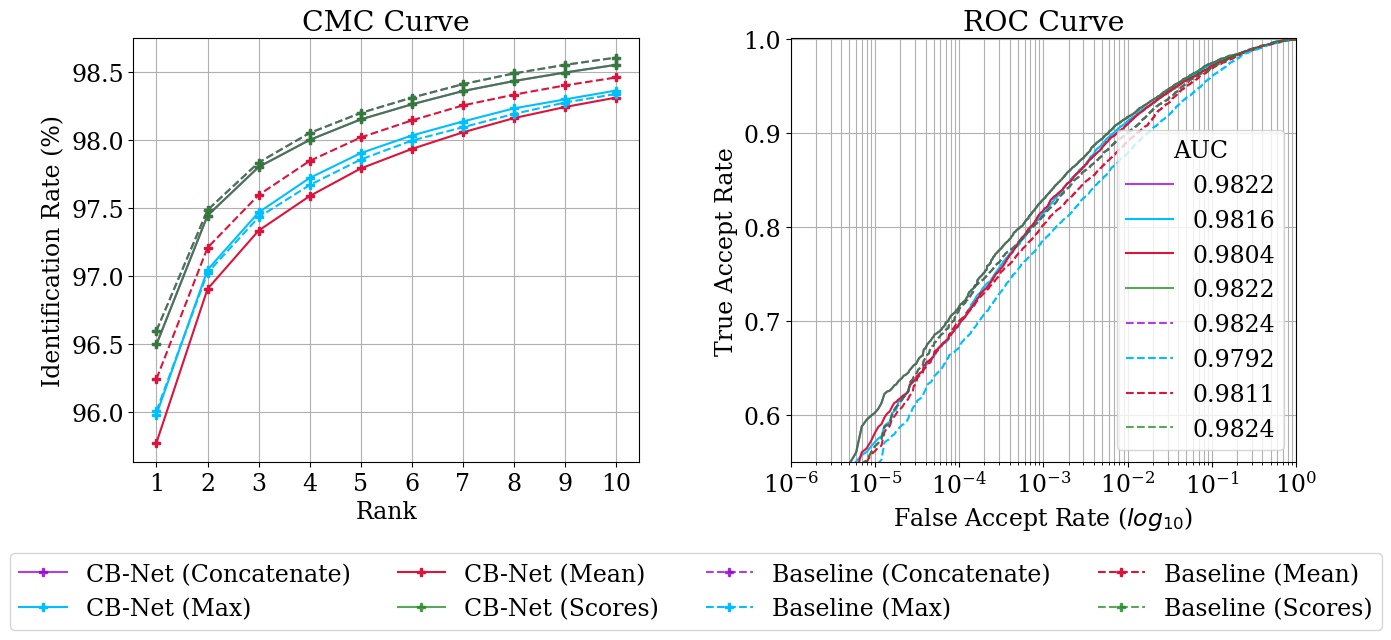

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({'font.size': 17, 'legend.fontsize': 17})    
fig, (ax1, ax2) = plt.subplots(1, 2)
# fig, ax = plt.figure()
fig.set_figheight(5.5)
fig.set_figwidth(15)
ax1.grid(which='both')
ax1.set_xticks(ticks)
ax1.set_title('CMC Curve')
mm_concat_cmc = ax1.plot(rng, 100 * mm_cmc_dict_concat['avg'], marker = 'P', alpha=0.75, color = 'darkviolet')
mm_max_cmc = ax1.plot(rng, 100 * mm_cmc_dict_max['avg'], marker = 'P', color = 'deepskyblue')
mm_mean_cmc = ax1.plot(rng, 100 * mm_cmc_dict_mean['avg'], marker = 'P', color = 'crimson')
mm_score_cmc = ax1.plot(rng, 100 * mm_cmc_dict_score['avg'], marker = 'P', alpha=0.75, color = 'forestgreen')
mm_concat_cmc_base = ax1.plot(rng, 100 * mm_cmc_dict_concat_base['avg'], marker = 'P', alpha=0.75, color = 'darkviolet', linestyle='--')
mm_max_cmc_base = ax1.plot(rng, 100 * mm_cmc_dict_max_base['avg'], marker = 'P', color = 'deepskyblue', linestyle='--')
mm_mean_cmc_base = ax1.plot(rng, 100 * mm_cmc_dict_mean_base['avg'], marker = 'P', color = 'crimson', linestyle='--')
mm_score_cmc_base = ax1.plot(rng, 100 * mm_cmc_dict_score_base['avg'], marker = 'P', alpha=0.75, color = 'forestgreen', linestyle='--')
ax1.set_xlabel('Rank')
ax1.set_ylabel('Identification Rate (%)')

plt.subplots_adjust(wspace=0.3)

ax2.grid(which='both')
ax2.set_title('ROC Curve')
mm_concat_roc = plt.plot(range_, mm_tpr_concat, label=str(round(mm_avg_concat[0], 4)), alpha=0.75, color = 'darkviolet')
mm_max_roc = plt.plot(range_, mm_tpr_max, label=str(round(mm_avg_max[0], 4)), color = 'deepskyblue')
mm_mean_roc = plt.plot(range_, mm_tpr_mean, label=str(round(mm_avg_mean[0], 4)), color = 'crimson')
mm_score_roc = plt.plot(range_, mm_tpr_score, label=str(round(mm_avg_score[0], 4)), alpha=0.75, color = 'forestgreen')
mm_concat_roc_base = plt.plot(range_, mm_tpr_concat_base, label=str(round(mm_avg_concat_base[0], 4)), alpha=0.75, color = 'darkviolet', linestyle='--')
mm_max_roc_base = plt.plot(range_, mm_tpr_max_base, label=str(round(mm_avg_max_base[0], 4)), color = 'deepskyblue', linestyle='--')
mm_mean_roc_base = plt.plot(range_, mm_tpr_mean_base, label=str(round(mm_avg_mean_base[0], 4)), color = 'crimson', linestyle='--')
mm_score_roc_base = plt.plot(range_, mm_tpr_score_base, label=str(round(mm_avg_score_base[0], 4)), alpha=0.75, color = 'forestgreen', linestyle='--')
ax2.semilogx(base=10)
ax2.set_ylabel('True Accept Rate')
ax2.set_xlabel('False Accept Rate ($log_{10}$)')
ax2.legend(bbox_to_anchor=(1, 0), loc="lower right", title="AUC")
ax2.set_xlim(10e-7, 10e-1)
ax2.set_ylim(0.55, 1.001)

line_labels = ["CB-Net (Concatenate)", "CB-Net (Max)", "CB-Net (Mean)", "CB-Net (Scores)", "Baseline (Concatenate)", "Baseline (Max)", "Baseline (Mean)", "Baseline (Scores)"]

fig.legend([mm_concat_roc, mm_max_roc, mm_mean_roc, mm_score_roc, mm_concat_roc_base, mm_max_roc_base, mm_mean_roc_base, mm_score_roc_base],     # The line objects
   labels=line_labels,   # The labels for each line
   loc="lower center",
   bbox_to_anchor=(0.5, -0.2),
   ncol=4,    # Position of legend
   borderaxespad=0.1)

plt.savefig('../graphs/cmc_roc/mm_CMC_ROC.pdf', bbox_inches='tight')
plt.show()
plt.clf()